# Review Chain

### Put Your OPENROUTER_API_KEY here

In [ ]:
import os
os.environ["OPENROUTER_API_KEY"] = "paste_your_api_key_here"

In [ ]:
!pip3 install langchain langchain_openai

In [ ]:
import os
from langchain_openai import ChatOpenAI

try:
    model_name
except NameError:
    model_name="openai/gpt-4o-mini"

print("Model Name:", model_name)
print("Provider:", "OpenRouter AI")

llm=ChatOpenAI(model_name=model_name,
               openai_api_key=os.environ.get("OPENROUTER_API_KEY"),
               openai_api_base="https://openrouter.ai/api/v1")

In [ ]:
import textwrap
from langchain_core.prompts import ChatPromptTemplate

def wrap_text(text, max_width=80):
    """
    Wraps the text to the specified max_width, preserving line breaks and formatting.
    """
    text = text.lstrip()
    lines = text.splitlines()  # Split the text into lines
    wrapped_lines = []
    for line in lines:
        if line.strip():  # Skip empty lines
            wrapped_line = textwrap.fill(line, max_width, initial_indent='', subsequent_indent='')
            wrapped_lines.extend(wrapped_line.splitlines())  # Preserve line breaks
        else:
            wrapped_lines.append('')  # Keep empty lines
    return '\n'.join(wrapped_lines)

def print_prompt_and_response(prompt, response):
    print("Prompt: ")
    print(wrap_text(prompt))
    print("")
    print("Response: ")
    print(response)

def print_messages_and_response(messages, response):
    prompt = ChatPromptTemplate(messages=messages)
    print_prompt_and_response(prompt.format(), response)

def get_completion(prompt, temperature=0.0):
    response = llm.invoke(prompt, temperature=temperature)
    wrapped_response = wrap_text(response.content)
    return wrapped_response

def get_completion_messages(messages, temperature=0.0):
    response=llm.invoke(messages, temperature=temperature)
    wrapped_response = wrap_text(response.content)
    return wrapped_response

## Review Chain

We will analyze a customer review and summarize it. Then try to compose
a response.

Here are the steps in the analysis. Each of these will be a different
call to the LLM. So we will call the LLM 4 times in this chain.

1.  **Analyze the sentiment of the original review on a scale of 1 to
    5**: The sentiment of the original review is analyzed on a scale of
    1 (very negative) to 5 (very positive) by prompting a language
    model.

2.  **Categorize the Review Based On the Main Issue**: The main issue or
    concern raised in the review is categorized into one of the
    following categories: Product Quality, Shipping/Delivery, Customer
    Service, Pricing, or Other.

3.  **Suggest Potential Improvements Based On the Review**: At least
    three potential improvements or changes are suggested to address the
    customer’s concerns based on the review.

4.  **Write an individualized email response to the customer**: A polite
    and professional email response is drafted, addressing the
    customer’s concerns.

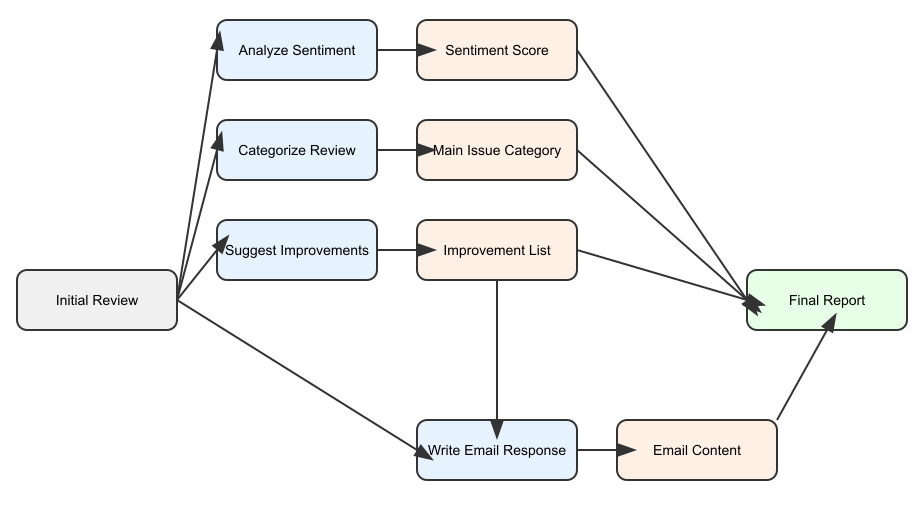

We will use reviews from this page:

[Brooks-Adrenaline-Womens-Supportive-Running](https://www.amazon.com/product-reviews/B08QVFHB8Y/ref=acr_dp_hist_1?ie=UTF8&filterByStar=one_star&reviewerType=all_reviews#reviews-filter-bar)

We are going to use mostly negative reviews since we want compose an
email to the customer about addressing their concerns.

### Initial Review

Lets start with the review text. We put them it the variable
`current_review`

In [ ]:
review = """I don't know if you can tell from these pictures, but the
top part of these shoes do not look like these are a matched pair. Moreover,
the quality in the Brooks Adrenaline has plummeted over the years. The material
on top is thinner and just cheaper feeling/looking overall. The fit is more
narrow. The cushioning barely there, feels uneven throughout the foot bed,
rather than smooth not to mention a poor attempt at arch support. The outside
of the sole is misleading with the appearance that there will be more support
in the arch and a cushioned feel overall, but that isn't the reality. The other
thing I don't like is how the front part of running shoes is getting thinner.
But that's pretty much every brand doing that in the name of creating a rocking
wave. Maybe the science says, "Yes, manufacturers, do this," but the painful
balls of my feet and cramping toes say, "Please stop doing this!" And
puhleez-the shoe laces are way too short. I barely, barely was able to get a
small bow tied in the left shoe that looks navy. Maybe this was just a (highly)
defective pair, but seriously, I have my doubts. I've been making do with my
2019 version of Brooks Adrenaline because ever since then, the quality has been
lacking. I was hoping for a better experience this time. Nope. If anything,
this trial was the worst of them all. Looks like my days with Brooks are over.
Time to find a better quality brand because these shoes are so not worth
anywhere near the amount on the price tag listed. Disappointed! I hope you have
a better experience. Please be sure to check who the seller is for the pair you
want and what the return policy is just in case."""

### Analyze the Sentiment

Create a prompt to ask the LLM to analyze our review for a rating score.

-   Ask the LLM to analyze the review on a scale of 1(very negative) to
    5(very positive)
-   Instruct the LLM to return just the number 1 through 5
-   Include a template variable called `{review}` so you can pass in a
    review for this prompt.
-   Template variables needed: `{review}`

In [ ]:
template = """

<<REPLACE THIS AND PUT YOUR PROMPT TEMPLATE HERE>>

"""

prompt = template.format(review=review)
sentiment_response= get_completion(prompt)
print(sentiment_response)

### Categorize the Review

Categorize the Review Based On the Main Issue

-   Ask the LLM to categorize the main issue or concern raised in the
    review
-   Tell the LLM it should categorize it into the following categories:
    Product Quality, Shipping/Delivery, Customer Service, Pricing,
    Other.
-   Ask it to just give the categories nothing more
-   Template variables needed: `{review}`

In [ ]:
template ="""

<<REPLACE THIS AND PUT YOUR PROMPT TEMPLATE HERE>>

"""

prompt = template.format(review=review)
categorize_response = get_completion(prompt)
print(categorize_response)

### Suggest Potential Improvements

Lets suggest 3 potential improvements

-   Ask the LLM for three potential improvements or changes that could
    address the customer’s concerns
-   Template variables needed: `{review}`

In [ ]:
template = """

<<REPLACE THIS AND PUT YOUR PROMPT TEMPLATE HERE>>

"""

prompt = template.format(review=review)
improvements_response = get_completion(prompt)
print(improvements_response)

### Write an Individualized Response

Write an individualized email response to the customer python

-   Ask the LLM to write a brief but polite and professional email
    response to the customer.
-   Tell the LLM not to mention any return policy or refund
-   Tell the LLM to mention that we are working on improvements
-   Template variables needed: `{review}`, `{improvements}`

In [ ]:
template = """

<<REPLACE THIS AND PUT YOUR PROMPT TEMPLATE HERE>>

"""

prompt = template.format(review=review,
                          improvements=improvements_response)
email_response = get_completion(prompt)
print(email_response)

### Final Report for This Review

In [ ]:
report_template = """
### Initial Review
{review}

### Sentiment 1 (very negative) to 5 (very positive)
{sentiment}

### Categorized Main Issue
{categorize}

### Potential Improvements
{improvements}

### Individualized Email Response
{email}
"""

report = report_template.format(review=review,
                                sentiment=sentiment_response,
                                categorize=categorize_response,
                                improvements=improvements_response,
                                email=email_response)
print(report)